# Data Analysis Of Google App's Ratings 

##  Import the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
google_data = pd.read_csv("C:/Users/amanb/Desktop/GoogleAppRating-DataAnalysis-master/GoogleAppRating-DataAnalysis-master/googleplaystore.csv")
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google_data.shape

(10841, 13)

In [4]:
google_data.describe()     #summary statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
google_data[['Rating']].idxmax()

Rating    10472
dtype: int64

In [6]:
google_data[google_data.Rating == google_data.Rating.max()]   #selecting the row having maximum rating value among all rows 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


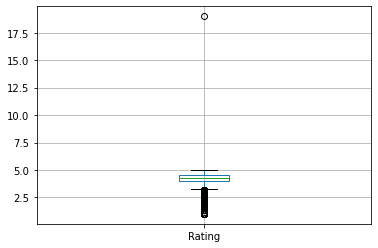

In [7]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13F10C28>]],
      dtype=object)

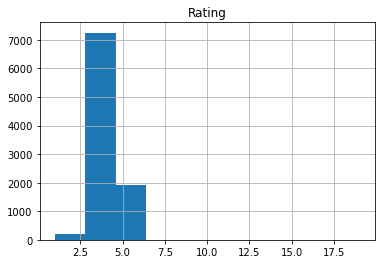

In [8]:
google_data.hist()

In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [10]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## DATA CLEANING

In [11]:
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
google_data.drop([10472], inplace= True)

In [13]:
google_data[10470:10475]      # the row "10472" is removed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


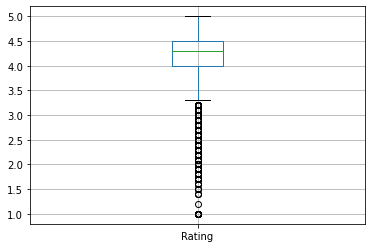

In [14]:
google_data.boxplot()  # we just have only one outlier which is removed now

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1408B3E8>]],
      dtype=object)

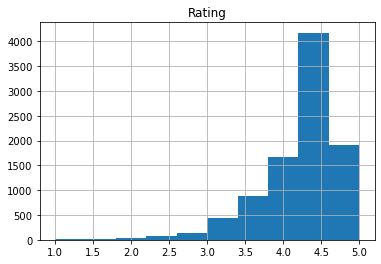

In [15]:
google_data.hist() 

###  Remove columns thta are more empty then filled 

In [16]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
threshold= len(google_data)*0.1  # 10% of the total row count
threshold

1084.0

In [18]:
google_data.dropna(thresh=threshold, axis= 1, inplace=True)
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [19]:
google_data.shape     # none of the column is dropped because no column is 90% empty or i can say no column hav eless amount of data ie 10% data 

(10840, 13)

## Data Imputation and Manipulation

#### Fill the values with appropriate values using aggregate functions such as mean , median or mode 

In [20]:
# define a function to fill the null values with the median 
def impute_median(series):
    return series.fillna(series.median())

In [21]:
google_data.Rating= google_data['Rating'].transform(impute_median)    # filling the null values with median through the impute_median function

In [22]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [23]:
# checking the mode values for categorical values 
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [24]:
# fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)

In [25]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [26]:
#let's convert price reviews and ratings into numerical values to perform some analysis on them
google_data['Price']= google_data['Price'].apply(lambda x: str(x).replace('$', "" )if '$' in str(x) else str(x))
google_data['Price']= google_data['Price'].apply(lambda x : float(x))
google_data['Reviews']= pd.to_numeric(google_data['Reviews'], errors='coerce')

In [29]:
google_data['Installs']= google_data['Installs'].apply( lambda x : str(x).replace("+",'') if "+" in str(x) else str(x))
google_data['Installs']= google_data['Installs'].apply( lambda x : str(x).replace(",",'') if "," in str(x) else str(x))
google_data['Installs']= google_data['Installs'].apply( lambda x : float(x))

In [30]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
google_data['Installs'].dtype

dtype('float64')

In [36]:
google_data.describe()      # summary stats , now 3 more columns are converted intoo numerical value to apply analysis

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## DATA VISUALIZATION 

In [38]:
grp= google_data.groupby('Category')
x= grp['Rating'].agg(np.mean)
y= grp['Price'].agg(np.sum)
z= grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Text(0, 0.5, 'Ratings -->')

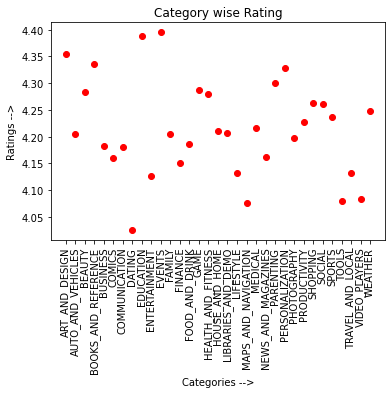

In [43]:
plt.plot(x,"ro")
plt.xticks(rotation=90)
plt.title("Category wise Rating")
plt.xlabel("Categories -->")
plt.ylabel('Ratings -->')

Text(0, 0.5, 'Ratings -->')

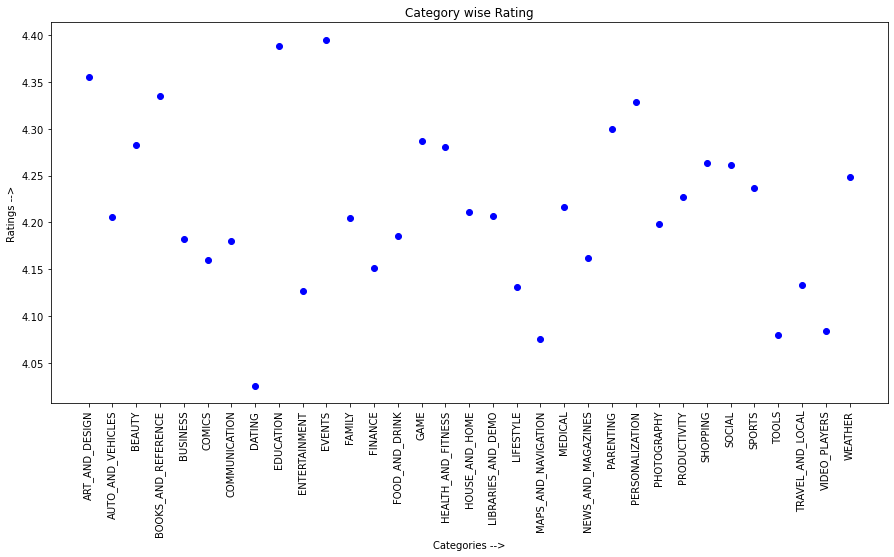

In [45]:
plt.figure(figsize=(15,7))
plt.plot(x,'ro', color='b')
plt.xticks(rotation=90)
plt.title("Category wise Rating")
plt.xlabel("Categories -->")
plt.ylabel('Ratings -->')

Text(0, 0.5, 'Price -->')

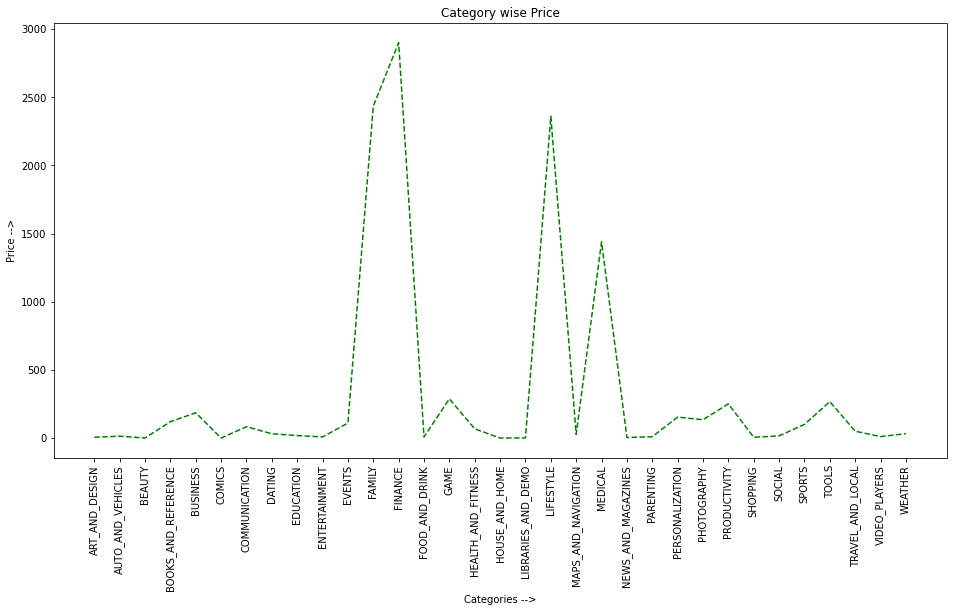

In [53]:
plt.figure(figsize=(16,8))
plt.plot(y,'r--', color='g')
plt.xticks(rotation=90)
plt.title("Category wise Price")
plt.xlabel("Categories -->")
plt.ylabel('Price -->')

Text(0, 0.5, 'Reviews -->')

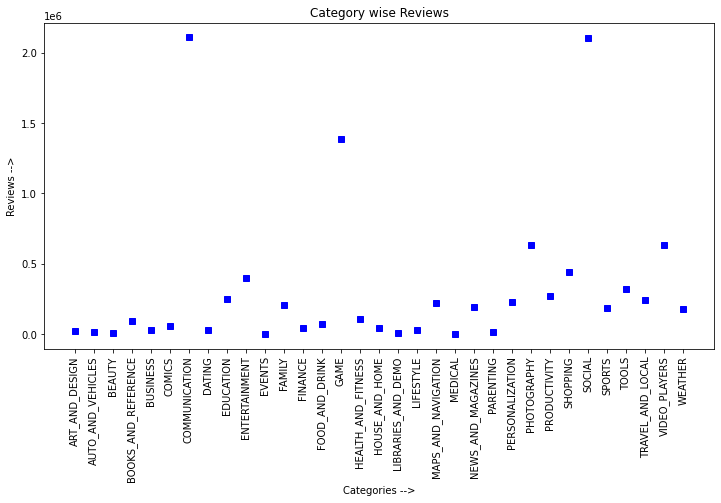

In [52]:
plt.figure(figsize=(12,6))
plt.plot(z,'bs', color='b')
plt.xticks(rotation=90)
plt.title("Category wise Reviews")
plt.xlabel("Categories -->")
plt.ylabel('Reviews -->')